# 単純集計

In [1]:
# コード3.9 集計のためのモジュールの読み込み
import pandas as pd

import os
os.makedirs('out', exist_ok=True)

### Google Colabを利用する場合は、次のセルの全行の#を1つ削除して実行する

In [2]:
# Google Driveをマウント
#from google.colab import drive
#drive.mount('/content/drive')

## Google DriveのColab Notebooksにダウンロードしたフォルダ(marketing)をセットすることを想定
#iPath = '/content/drive/MyDrive/Colab Notebooks/marketing/Chapter_3/in/'
#zipFile = iPath+'sec3-2data.csv.zip'

## データを解凍（テキスト本文は解凍後のファイルを読み込んでいる）
#import zipfile

#with zipfile.ZipFile(zipFile) as existing_zip:
#    existing_zip.extractall()

## データフレームへの読み込み
#iFile='sec3-2data.csv'
#df_all = pd.read_csv(iFile)


In [33]:
# データを解凍（テキスト本文は解凍後のファイルを読み込んでいる）
import zipfile

with zipfile.ZipFile('in/sec3-2data.csv.zip') as existing_zip:
    existing_zip.extractall('in')

# データフレームへの読み込み
df_all = pd.read_csv('in/sec3-2data.csv')
df_all

,日付,購入数量,単価,金額,大分類,中分類,小分類,細分類,大分類名,中分類名,小分類名,細分類名,都道府県名
0,20130530,1,278,278,1,11,1115,111511,食品,加工食品,加工肉類,ベーコン,大阪府
1,20130627,1,98,98,1,11,1113,111303,食品,加工食品,パン・シリアル類,菓子パン,大阪府
2,20131031,1,98,98,1,11,1113,111303,食品,加工食品,パン・シリアル類,菓子パン,大阪府
3,20131130,1,188,188,1,11,1117,111703,食品,加工食品,漬物・佃煮,佃煮,大阪府
4,20131214,1,166,166,1,13,1301,130127,食品,菓子類,菓子,ビスケット・クッキ?,大阪府
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344816,20130202,1,88,88,1,13,1302,130205,食品,菓子類,デザート・ヨーグルト,ヨーグルト,茨城県
6344817,20130525,1,118,118,1,13,1301,130123,食品,菓子類,菓子,チョコレ?ト,茨城県
6344818,20130425,1,98,98,1,11,1112,111203,食品,加工食品,麺類,カップ麺,茨城県
6344819,20130706,1,98,98,1,11,1112,111203,食品,加工食品,麺類,カップ麺,茨城県


In [4]:
# コード3.10 集計の実行と構成比率の計算
# 集計キーの指定
df_groupby1 = df_all.groupby('大分類名', as_index=False)

# 集計キーについて，購入数量の合計を計算. （sum()を使う方法以外に.agg()を使うことも可能）
df_groupby_q = df_groupby1.agg({'購入数量': 'sum'})

# 構成比率の計算
df_groupby_q['構成比率'] = pd.DataFrame(
    df_groupby_q['購入数量']).apply(lambda x: x/sum(x))

In [5]:
# 3.11 集計結果の出力
# 集計結果の出力
pd.options.display.float_format = '{: <10.2%}'.format
df_groupby_q

,大分類名,購入数量,構成比率
0,文化用品,49405,0.63%
1,日用品,844745,10.69%
2,耐久消費財,17443,0.22%
3,衣類・身の回り品・スポーツ用品,3660,0.05%
4,食品,6985143,88.42%


In [6]:
# 表示のリセット
pd.options.display.float_format = None

例題3.4

In [7]:
# コード3.12 金額の集計
# 金額に関する集計と構成比率
df_groupby_s = df_groupby1.agg({'金額': 'sum'})
df_groupby_s['構成比率'] = pd.DataFrame(
    df_groupby_s['金額']).apply(lambda x: x/sum(x))

In [8]:
# 集計結果の出力
pd.options.display.float_format = '{: <10.2%}'.format
df_groupby_s

,大分類名,金額,構成比率
0,文化用品,14507064,0.96%
1,日用品,320281312,21.23%
2,耐久消費財,13725924,0.91%
3,衣類・身の回り品・スポーツ用品,2321927,0.15%
4,食品,1157980399,76.75%


In [9]:
# 表示のリセット
pd.options.display.float_format = None

クロス集計

In [10]:
# コード3.13 都道府県と大分類のクロス集計
# 大分類クロス集計
pt_all = pd.pivot_table(df_all, values='購入数量',
                        index='都道府県名', columns='大分類名', aggfunc='sum')
pt_all

大分類名,文化用品,日用品,耐久消費財,衣類・身の回り品・スポーツ用品,食品
都道府県名,,,,,
兵庫県,3865,62505,1112,266,609932
北海道,4130,92202,2008,452,715934
千葉県,5680,93298,1927,426,631874
埼玉県,5120,87295,1747,320,731999
大阪府,7793,121946,2420,583,1080425
愛知県,6486,114949,2276,429,974383
神奈川県,7948,132658,2260,585,1022132
福岡県,6187,102711,2926,479,792718
茨城県,2196,37181,767,120,425746


例題3.5

In [11]:
# コード3.14 構成比率のクロス集計
# 都道府県ごとの大分類構成比率
pt_all_ratio = pt_all.apply(lambda x: x/sum(x), axis=1)
pd.options.display.float_format = '{: <10.2%}'.format
pt_all_ratio

大分類名,文化用品,日用品,耐久消費財,衣類・身の回り品・スポーツ用品,食品
都道府県名,,,,,
兵庫県,0.57%,9.22%,0.16%,0.04%,90.00%
北海道,0.51%,11.32%,0.25%,0.06%,87.87%
千葉県,0.77%,12.72%,0.26%,0.06%,86.18%
埼玉県,0.62%,10.56%,0.21%,0.04%,88.57%
大阪府,0.64%,10.05%,0.20%,0.05%,89.06%
愛知県,0.59%,10.46%,0.21%,0.04%,88.70%
神奈川県,0.68%,11.38%,0.19%,0.05%,87.69%
福岡県,0.68%,11.35%,0.32%,0.05%,87.59%
茨城県,0.47%,7.98%,0.16%,0.03%,91.36%


In [12]:
# 表示のリセット
pd.options.display.float_format = None

In [13]:
# コード3.15 食品中分類のクロス集計
# 食品のみの抽出
df_syokuhin = df_all[df_all['大分類名'] == '食品']

# 食品中分類のクロス集計
pt_syokuhin = pd.pivot_table(
    df_syokuhin, values='購入数量', index='都道府県名', columns='中分類名', aggfunc='sum')

pt_syokuhin

中分類名,その他食品,加工食品,生鮮食品,菓子類,飲料・酒類
都道府県名,,,,,
兵庫県,13921,281759,60092,130601,123559
北海道,21628,297623,76934,153690,166059
千葉県,21193,261922,48991,147650,152118
埼玉県,21274,314066,62130,161719,172810
大阪府,27398,480621,103088,233040,236278
愛知県,27537,428889,99163,214052,204742
神奈川県,26949,427762,87573,226502,253346
福岡県,21854,355791,70768,170437,173868
茨城県,12265,188171,36808,96063,92439


例題3.6

In [14]:
# コード3.16 食品中分類の構成比率のクロス集計
# 食品大分類の都道府県ごとの中分類構成比率
pt_syokuhin_ratio = pt_syokuhin.apply(lambda x: x/sum(x), axis=1)
pd.options.display.float_format = '{: <10.2%}'.format
pt_syokuhin_ratio

中分類名,その他食品,加工食品,生鮮食品,菓子類,飲料・酒類
都道府県名,,,,,
兵庫県,2.28%,46.20%,9.85%,21.41%,20.26%
北海道,3.02%,41.57%,10.75%,21.47%,23.19%
千葉県,3.35%,41.45%,7.75%,23.37%,24.07%
埼玉県,2.91%,42.91%,8.49%,22.09%,23.61%
大阪府,2.54%,44.48%,9.54%,21.57%,21.87%
愛知県,2.83%,44.02%,10.18%,21.97%,21.01%
神奈川県,2.64%,41.85%,8.57%,22.16%,24.79%
福岡県,2.76%,44.88%,8.93%,21.50%,21.93%
茨城県,2.88%,44.20%,8.65%,22.56%,21.71%


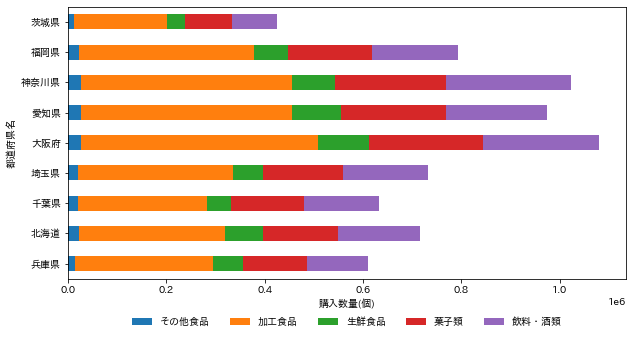

In [15]:
# japanize_matplotlibaがインストールされていない場合は以下を実行
#!pip install japanize_matplotlib

# コード3.17 都道府県別食品中分類の積上げ横棒グラフの作成
import japanize_matplotlib

# 積み上げ横棒グラフ
ax = pt_syokuhin.plot.barh(stacked=True, figsize=(10, 5))
ax.legend(pt_syokuhin.columns.tolist(), loc="lower center", ncol=5, bbox_to_anchor=(
    0.5, -0.1), frameon=False, borderaxespad=-2.5)  # 凡例表示位置の調整
ax.set_xlabel('購入数量(個)')

# 図をファイルに出力する場合は以下を実行する
ax.get_figure().savefig('out/cum_barchart.eps', bbox_inches='tight', dpi=600)

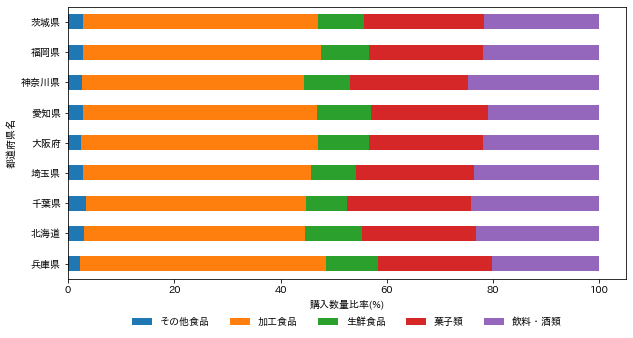

In [15]:
# コード3.18 都道府県別食品中分類の構成比率の帯グラフの作成
# 帯グラフ
pt_syokuhin_ratio100 = pt_syokuhin_ratio * 100
ax = pt_syokuhin_ratio100.plot.barh(stacked=True, figsize=(10, 5))
ax.legend(pt_syokuhin.columns.tolist(), loc="lower center", ncol=5, bbox_to_anchor=(
    0.5, -0.1), frameon=False, borderaxespad=-2.5)  # 凡例表示位置の調整
ax.set_xlabel('購入数量比率(%)')
ax.get_figure().savefig('out/tiechart.eps', bbox_inches='tight', dpi=600)

In [16]:
pd.options.display.float_format = None

In [17]:
# コード3.19 冷凍食品のクロス集計
# 冷凍食品の分析
# df_reisyoku = df_syokuhin[df_syokuhin['小分類名'] == '冷凍食品'] #冷凍食品だけの抽出の方法

# Google Colabを利用している場合
# iFile=iPath+'sec3-2data_reisyoku.csv'

df_reisyoku = pd.read_csv("in/sec3-2data_reisyoku.csv")
# クロス集計
pt_reisyoku = pd.pivot_table(df_reisyoku,
                             values='購入数量',
                             index='名称',
                             columns='都道府県名',
                             aggfunc='sum',
                             fill_value=0.
                             )

# 行合計の計算
pt_reisyoku['合計'] = pt_reisyoku.sum(axis=1)

# 合計値の大きい順に並び替え
pt_reisyoku = pt_reisyoku.sort_values('合計', ascending=False)

# 計算されたデータの確認
pt_reisyoku.head()

都道府県名,兵庫県,北海道,千葉県,埼玉県,大阪府,愛知県,神奈川県,福岡県,茨城県,合計
名称,,,,,,,,,,
冷凍食品4907,445,161,391,448,774,734,711,657,246,4567
冷凍食品2459,92,122,166,249,380,199,271,315,62,1856
冷凍食品4897,98,180,125,111,224,232,284,230,81,1565
冷凍食品1985,107,68,170,152,256,212,170,298,124,1557
冷凍食品4892,89,93,68,151,317,146,228,192,149,1433


例題3.7

In [19]:
# コード3.20 行列の大きさの確認
pt_reisyoku.shape

(5103, 10)

In [20]:
# コード3.21 冷凍食品上位30品目の抽出
# 上位30位の出力
pd.options.display.precision = 0
pt_reisyoku30 = pt_reisyoku.iloc[:30]
pt_reisyoku30

都道府県名,兵庫県,北海道,千葉県,埼玉県,大阪府,愛知県,神奈川県,福岡県,茨城県,合計
名称,,,,,,,,,,
冷凍食品4907,445,161,391,448,774,734,711,657,246,4567
冷凍食品2459,92,122,166,249,380,199,271,315,62,1856
冷凍食品4897,98,180,125,111,224,232,284,230,81,1565
冷凍食品1985,107,68,170,152,256,212,170,298,124,1557
冷凍食品4892,89,93,68,151,317,146,228,192,149,1433
冷凍食品2342,59,90,73,114,170,145,196,277,56,1180
冷凍食品1170,124,86,103,107,229,75,196,119,98,1137
冷凍食品4975,52,62,94,118,189,138,154,127,102,1036
冷凍食品2610,66,17,101,88,131,97,153,280,67,1000


例題3.8

In [21]:
# コード3.22 冷凍食品上位30品目の都道府県別構成比率
# 構成比率の計算（合計列は除く）
pt_reisyoku30ratio = pt_reisyoku30.iloc[:, :9].apply(
    lambda x: x/sum(x), axis=1)
pd.options.display.float_format = '{: <10.0%}'.format
pt_reisyoku30ratio

都道府県名,兵庫県,北海道,千葉県,埼玉県,大阪府,愛知県,神奈川県,福岡県,茨城県
名称,,,,,,,,,
冷凍食品4907,10%,4%,9%,10%,17%,16%,16%,14%,5%
冷凍食品2459,5%,7%,9%,13%,20%,11%,15%,17%,3%
冷凍食品4897,6%,12%,8%,7%,14%,15%,18%,15%,5%
冷凍食品1985,7%,4%,11%,10%,16%,14%,11%,19%,8%
冷凍食品4892,6%,6%,5%,11%,22%,10%,16%,13%,10%
冷凍食品2342,5%,8%,6%,10%,14%,12%,17%,23%,5%
冷凍食品1170,11%,8%,9%,9%,20%,7%,17%,10%,9%
冷凍食品4975,5%,6%,9%,11%,18%,13%,15%,12%,10%
冷凍食品2610,7%,2%,10%,9%,13%,10%,15%,28%,7%


In [22]:
pd.options.display.float_format = None

順位相関係数

In [23]:
# コード3.23 スピアマンの順位相関係数
rank_corr = pt_reisyoku30.drop('合計', axis=1).corr(method='spearman')
pd.options.display.precision = 3  # 小数桁数の指定
rank_corr

都道府県名,兵庫県,北海道,千葉県,埼玉県,大阪府,愛知県,神奈川県,福岡県,茨城県
都道府県名,,,,,,,,,
兵庫県,1.000,0.268,0.138,0.012,0.437,0.089,0.117,0.331,0.159
北海道,0.268,1.000,0.322,0.147,0.406,0.438,0.492,0.237,0.142
千葉県,0.138,0.322,1.000,0.568,0.407,0.485,0.474,0.451,0.196
埼玉県,0.012,0.147,0.568,1.000,0.417,0.390,0.551,0.406,0.223
大阪府,0.437,0.406,0.407,0.417,1.000,0.370,0.260,0.352,0.224
愛知県,0.089,0.438,0.485,0.390,0.370,1.000,0.326,0.694,0.411
神奈川県,0.117,0.492,0.474,0.551,0.260,0.326,1.000,0.522,0.131
福岡県,0.331,0.237,0.451,0.406,0.352,0.694,0.522,1.000,0.412
茨城県,0.159,0.142,0.196,0.223,0.224,0.411,0.131,0.412,1.000


In [24]:
# コード3.24 相関係数の低い組合せの抽出
# 相関の低い組合せとその都道府県名の出力
rank_corr.stack().sort_values().head(1)

# pandas versions 1.1.0以降を利用している場合は、以下も可能
# rank_corr.melt(ignore_index=False).sort_values('value').head(1)
# ignore_indexはpandas versions 1.1.0で追加されたオプション

都道府県名  都道府県名
兵庫県    埼玉県      0.012
dtype: float64